<a href="https://colab.research.google.com/github/AliKemalIstanbullu/P1---Fire-Detection-and-Localization-Using-Surveillance-Camera/blob/main/fireDedection_01November2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fire dedection with Yolov5**

# **Installation**

In [ ]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # installing repostory
%cd yolov5
%pip install -qr requirements.txt # install required libraries
%pip install -q roboflow #roboflow install

import torch
import os
from IPython.display import Image, clear_output  # resimleri görüntülemek için

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})") #Display which GPU using in Colab computer

Cloning into 'yolov5'...
remote: Enumerating objects: 16031, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 16031 (delta 36), reused 42 (delta 25), pack-reused 15967
Receiving objects: 100% (16031/16031), 14.69 MiB | 14.80 MiB/s, done.
Resolving deltas: 100% (11002/11002), done.
/content/yolov5_old_files/yolov5/yolov5
Setup complete. Using torch 2.1.0+cu118 (Tesla T4)


# **Activate Roboflow and download roboflow dataset [link text](https://)**

In [ ]:
!pip install roboflow

# Roboflow dataset link should written here!
from roboflow import Roboflow
rf = Roboflow(api_key="JEWphJwqR34McoBEUne9")
project = rf.workspace("durhamcollege").project("firededection")
dataset = project.version(1).download("yolov5")


# Start of Sample project related codes

# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="JEWphJwqR34McoBEUne9")
# project = rf.workspace("durhamcollege").project("yangin-tanima")
# dataset = project.version(1).download("yolov5")

# End of Sample project related codes


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/fireDedection-1 in yolov5pytorch:: 100%|██████████| 367/367 [00:00<00:00, 7213.53it/s]


In [ ]:
# install environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

# **Model training**

In [ ]:
# 171 pics, 10 batchs, 100 epochs training. Can take some time be patient!
!python train.py --img 171 --batch 10 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

2023-11-01 18:11:23.276018: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 18:11:23.276097: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 18:11:23.276142: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/datasets/fireDedection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=10, imgsz=171, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sy

# **Model succes in charts**

In [ ]:
# Start tensorboard

#save in "runs"
%reload_ext tensorboard
%tensorboard --logdir runs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-11-01 18:20:05.166280: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 18:20:05.166348: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 18:20:05.166386: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 18:20:05.173803: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with t

# **Testing our datas**

In [ ]:
#test resimlerimizi modele sokuyoruz ve sonuçlar en sonda belirtilen dosya konumuna kaydediliyor
# Testing our `test pics` and save related file location
#her farklı resim veya video eklediğinizde en sondaki exp1 exp2 diye artar. runs/detect/exp
# Folder name created after each try as exp1 exp2 exp3 ....
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 171 --conf 0.2 --source {dataset.location}/valid/images

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/datasets/fireDedection-1/valid/images, data=data/coco128.yaml, imgsz=[171, 171], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-231-gc2f131a Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [171, 171] must be multiple of max stride 32, updating to [192, 192]
image 1/8 /content/datasets/fireDedection-1/valid/images/images10_jpg.rf.8a29d2c9142e77a9bac076084cccd49a.jpg: 192x192 6 fires, 6.2ms
image 2/8 /content/datasets/fireDedection-1/valid/images/images

# **Show test results**

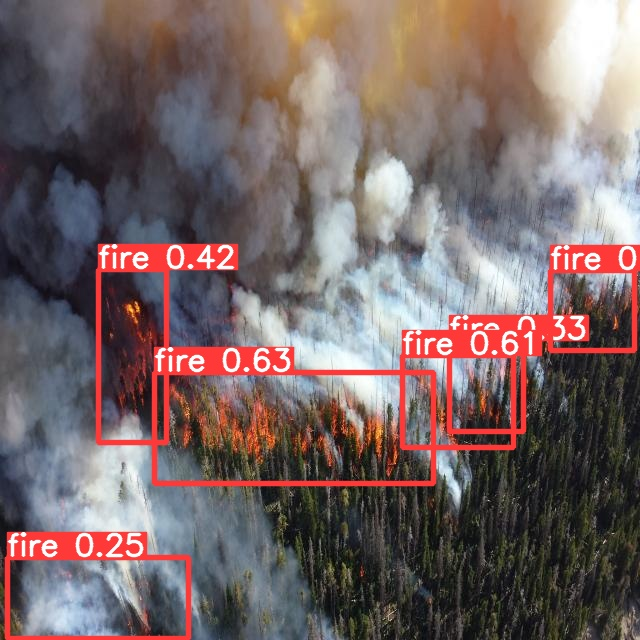

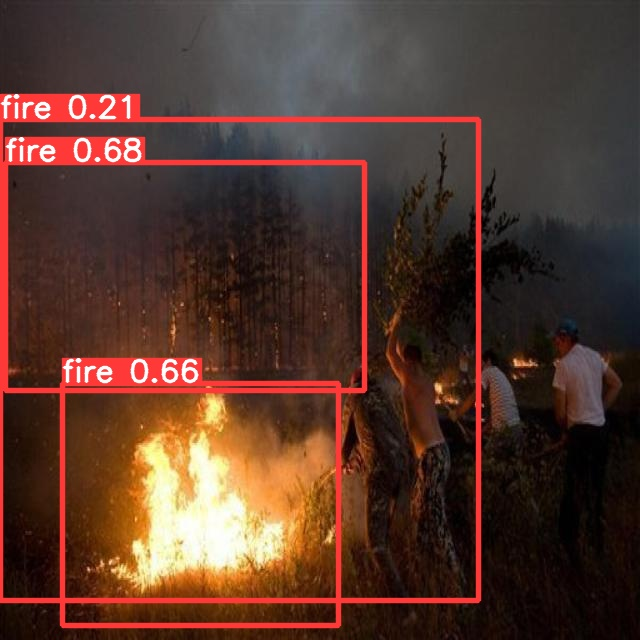

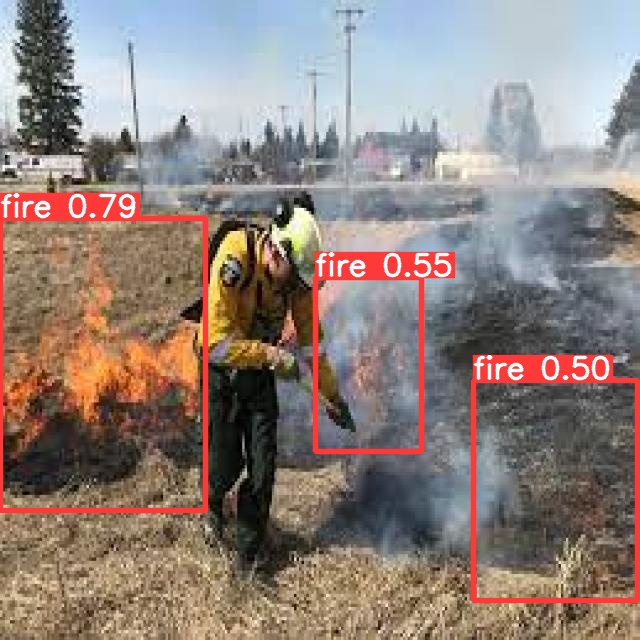

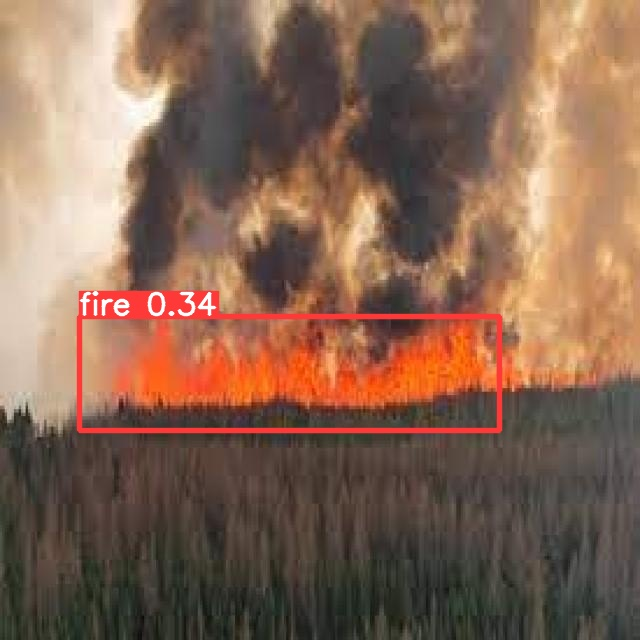

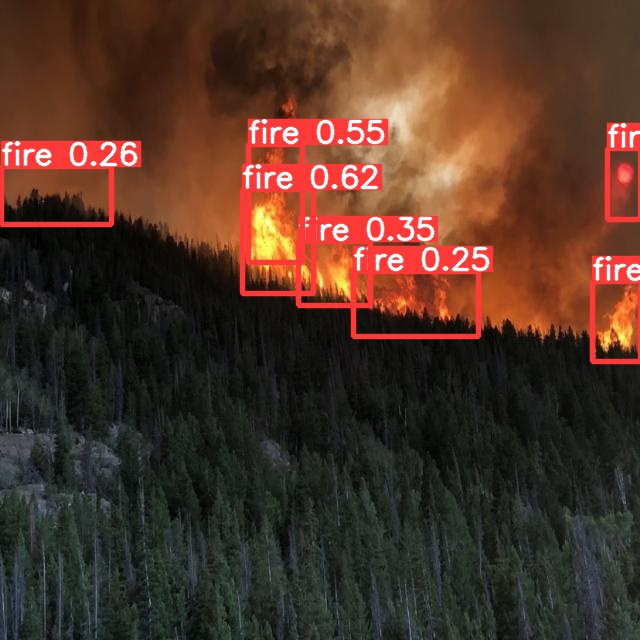

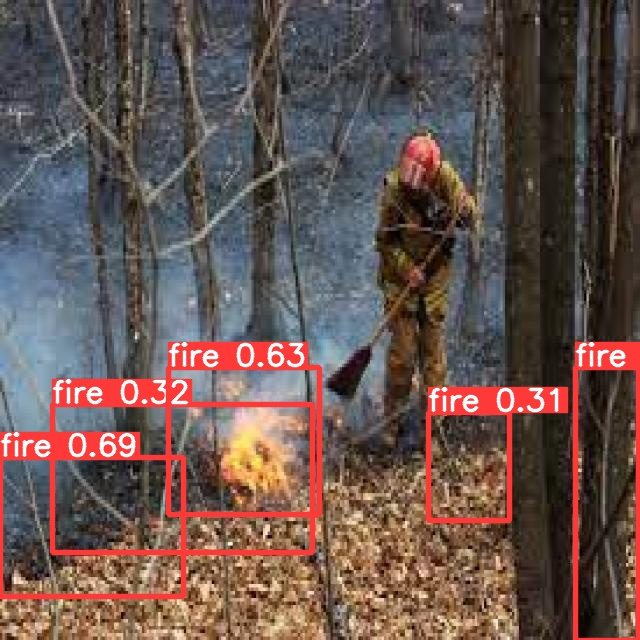

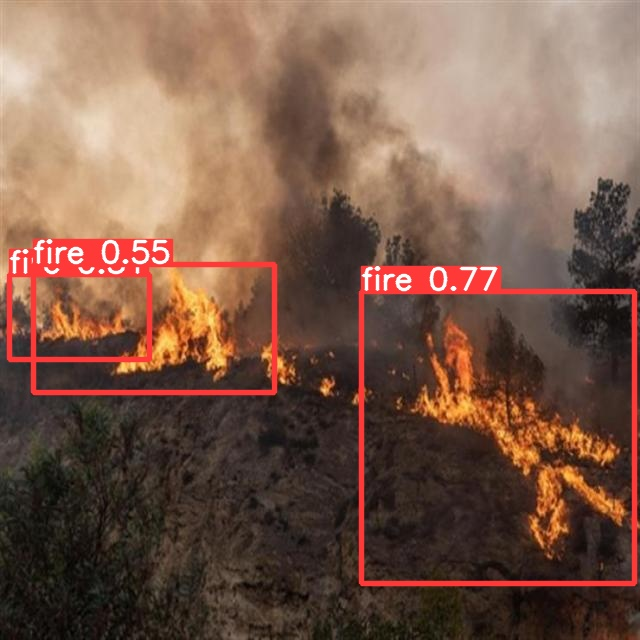

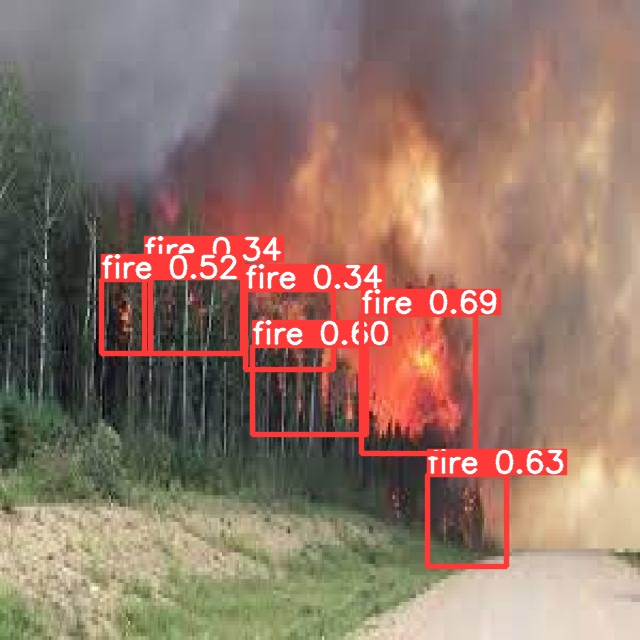

In [ ]:

#modelden çıkmış olan tüm test verilerini ekrana bastırarak sonuçları inceliyoruz.

import glob
from IPython.display import Image, display

i = 0
# lütfen glob.glob un içine doğru dosya konumunu yazınız üst satırda en altta yazan results saved to runs/detects/exp1 veya runs/detects/exp2 veya runs/detects/exp3
for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #dosya uzantısını resimlerinizin formatına göre değiştirin jpg olmak zorunda değil.
    i += 1

    if i < 15:
      display(Image(filename=imageName))
      print("\n")

# **Save our model**

In [ ]:
#Modelin ağırlıklarını daha sonra kullanmak için bilgisayarımıza kaydediyoruz
# weigths of model saved for reuse
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
